## 1. IMPORTACION Y CARGA DE DATOS

In [1]:
import io
import pandas as pd

In [2]:
df = pd.read_csv("NetflixViewingHistory.csv")



## 2. ANALISIS EXPLORATORIO

In [3]:
df.shape ### filas y columnas

(1514, 2)

In [4]:
df.info() ## doce so hay nulos, el tipo de varibles, Objeto es cajon desaste de lo ques

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   1514 non-null   object
 1   Date    1514 non-null   object
dtypes: object(2)
memory usage: 23.8+ KB


In [5]:
df.head(50) ## Estrae los primeros casos y detectar

,Title,Date
0,You: Temporada 4: Retrato del artista,5/4/23
1,The Office (U.S.): Temporada 6: El otro,1/4/23
2,The Office (U.S.): Temporada 6: El encubrimiento,1/4/23
3,Hasta el fondo: La historia de Pornhub,18/3/23
4,You: Temporada 4: Joe se toma unas vacaciones,25/2/23
5,Junji Ito Maniac: Relatos japoneses de lo maca...,18/2/23
6,Junji Ito Maniac: Relatos japoneses de lo maca...,18/2/23
7,Junji Ito Maniac: Relatos japoneses de lo maca...,18/2/23
8,Puñales por la espalda: El misterio de Glass O...,18/2/23
9,"Extremadamente cruel, malvado y perverso",18/2/23


Se ven patrones tipo Serie: temporada: capitulo, peliculas no tiene eso

expand lo que ace es evitar que se generen nuevas columnas

In [6]:
separacion_lista = df.Title.str.split(pat = ":", expand = False).to_frame()
separacion_lista

,Title
0,"[You, Temporada 4, Retrato del artista]"
1,"[The Office (U.S.), Temporada 6, El otro]"
2,"[The Office (U.S.), Temporada 6, El encubrim..."
3,"[Hasta el fondo, La historia de Pornhub]"
4,"[You, Temporada 4, Joe se toma unas vacaciones]"
...,...
1509,"[Harry Potter y las Reliquias de la Muerte, P..."
1510,[Watchmen]
1511,[Harry Potter y el misterio del príncipe]
1512,"[Black Mirror, Temporada 4, Black Museum]"


Contar longitud lista con numero de partes. Aplica a todos los valores len

In [7]:
separacion_lista["num_partes"] = separacion_lista.Title.apply(len)
separacion_lista

,Title,num_partes
0,"[You, Temporada 4, Retrato del artista]",3
1,"[The Office (U.S.), Temporada 6, El otro]",3
2,"[The Office (U.S.), Temporada 6, El encubrim...",3
3,"[Hasta el fondo, La historia de Pornhub]",2
4,"[You, Temporada 4, Joe se toma unas vacaciones]",3
...,...,...
1509,"[Harry Potter y las Reliquias de la Muerte, P...",2
1510,[Watchmen],1
1511,[Harry Potter y el misterio del príncipe],1
1512,"[Black Mirror, Temporada 4, Black Museum]",3


con value counts vemos el numero de veces que se repite cada parte
asi sabemos que numero de aprtes es mas frecuente segun el producto

In [8]:
separacion_lista.num_partes.value_counts()

3    950
2    289
1    153
4    119
5      3
Name: num_partes, dtype: int64

ahora se busca si hay algún patrón , por ejemplo de los que tienen 3 y 2 partes, así filtramos metiendo solo numero de items concreto

In [9]:
separacion_lista.loc[separacion_lista.num_partes == 2].head(10)

,Title,num_partes
3,"[Hasta el fondo, La historia de Pornhub]",2
8,"[Puñales por la espalda, El misterio de Glass...",2
11,"[Summer '82, When Zappa Came to Sicily]",2
12,"[The Greatest Painters of the World, Salvador...",2
13,"[Pamela Anderson, Una historia de amor]",2
17,"[Monster, Capítulo 1]",2
19,"[Pokémon, Detective Pikachu]",2
22,"[Matilda, de Roald Dahl, El musical]",2
31,"[Nuestro universo, Persiguiendo la luz estelar]",2
48,"[1899, El barco]",2


In [10]:
separacion_lista.loc[separacion_lista.num_partes == 3].head(10)

,Title,num_partes
0,"[You, Temporada 4, Retrato del artista]",3
1,"[The Office (U.S.), Temporada 6, El otro]",3
2,"[The Office (U.S.), Temporada 6, El encubrim...",3
4,"[You, Temporada 4, Joe se toma unas vacaciones]",3
5,"[Junji Ito Maniac, Relatos japoneses de lo ma...",3
6,"[Junji Ito Maniac, Relatos japoneses de lo ma...",3
7,"[Junji Ito Maniac, Relatos japoneses de lo ma...",3
14,"[La playlist, Miniserie, El socio]",3
15,"[The Office (U.S.), Temporada 6, Lenguaje co...",3
16,"[The Office (U.S.), Temporada 6, El Día de l...",3


In [11]:
separacion_lista.loc[separacion_lista.num_partes == 1].head(10)

,Title,num_partes
9,"[Extremadamente cruel, malvado y perverso]",1
10,[Gandhi],1
21,[Pelé],1
30,[Pinocho de Guillermo del Toro],1
32,[Eric Clapton - The 1970s Review],1
33,[La decisión de Sophie],1
52,[La captura del enfermero asesino],1
71,[Las dos caras de la verdad],1
75,[El Ángel de la Muerte],1
76,[Volver],1



# 3.CREACION DE VARIABLES

Crear nueva variables según numero de partes.

## 3.1 Variables en finción del Título

In [12]:
import numpy as np

In [13]:
separacion_lista['tipo'] = np.where(separacion_lista.num_partes <3, "pelicula", "serie")
separacion_lista

,Title,num_partes,tipo
0,"[You, Temporada 4, Retrato del artista]",3,serie
1,"[The Office (U.S.), Temporada 6, El otro]",3,serie
2,"[The Office (U.S.), Temporada 6, El encubrim...",3,serie
3,"[Hasta el fondo, La historia de Pornhub]",2,pelicula
4,"[You, Temporada 4, Joe se toma unas vacaciones]",3,serie
...,...,...,...
1509,"[Harry Potter y las Reliquias de la Muerte, P...",2,pelicula
1510,[Watchmen],1,pelicula
1511,[Harry Potter y el misterio del príncipe],1,pelicula
1512,"[Black Mirror, Temporada 4, Black Museum]",3,serie


Ahora al dataframe principa (df), se le añade con pd.concat, la nueva variable extraida

In [14]:
df = pd.concat([df,separacion_lista["tipo"]], axis = 1)
df

,Title,Date,tipo
0,You: Temporada 4: Retrato del artista,5/4/23,serie
1,The Office (U.S.): Temporada 6: El otro,1/4/23,serie
2,The Office (U.S.): Temporada 6: El encubrimiento,1/4/23,serie
3,Hasta el fondo: La historia de Pornhub,18/3/23,pelicula
4,You: Temporada 4: Joe se toma unas vacaciones,25/2/23,serie
...,...,...,...
1509,Harry Potter y las Reliquias de la Muerte: Par...,15/5/19,pelicula
1510,Watchmen,13/5/19,pelicula
1511,Harry Potter y el misterio del príncipe,11/5/19,pelicula
1512,Black Mirror: Temporada 4: Black Museum,10/5/19,serie


Ahora dividimos los títulos en distintas variables (serie, temporada, part , titulo, etc... Ahora si qeu usamos expand 

In [15]:
separacion_cols = df.Title.str.split(pat = ":", expand=True) 
separacion_cols

,0,1,2,3,4
0,You,Temporada 4,Retrato del artista,None,None
1,The Office (U.S.),Temporada 6,El otro,None,None
2,The Office (U.S.),Temporada 6,El encubrimiento,None,None
3,Hasta el fondo,La historia de Pornhub,None,None,None
4,You,Temporada 4,Joe se toma unas vacaciones,None,None
...,...,...,...,...,...
1509,Harry Potter y las Reliquias de la Muerte,Parte 1,None,None,None
1510,Watchmen,None,None,None,None
1511,Harry Potter y el misterio del príncipe,None,None,None,None
1512,Black Mirror,Temporada 4,Black Museum,None,None


Ahora las renombramos

In [16]:
separacion_cols.columns = ["nivel1","nivel2","nivel3","nivel4","nivel5"]
separacion_cols

,nivel1,nivel2,nivel3,nivel4,nivel5
0,You,Temporada 4,Retrato del artista,None,None
1,The Office (U.S.),Temporada 6,El otro,None,None
2,The Office (U.S.),Temporada 6,El encubrimiento,None,None
3,Hasta el fondo,La historia de Pornhub,None,None,None
4,You,Temporada 4,Joe se toma unas vacaciones,None,None
...,...,...,...,...,...
1509,Harry Potter y las Reliquias de la Muerte,Parte 1,None,None,None
1510,Watchmen,None,None,None,None
1511,Harry Potter y el misterio del príncipe,None,None,None,None
1512,Black Mirror,Temporada 4,Black Museum,None,None


In [17]:
df = pd.concat([df,separacion_cols], axis = 1)
df

,Title,Date,tipo,nivel1,nivel2,nivel3,nivel4,nivel5
0,You: Temporada 4: Retrato del artista,5/4/23,serie,You,Temporada 4,Retrato del artista,None,None
1,The Office (U.S.): Temporada 6: El otro,1/4/23,serie,The Office (U.S.),Temporada 6,El otro,None,None
2,The Office (U.S.): Temporada 6: El encubrimiento,1/4/23,serie,The Office (U.S.),Temporada 6,El encubrimiento,None,None
3,Hasta el fondo: La historia de Pornhub,18/3/23,pelicula,Hasta el fondo,La historia de Pornhub,None,None,None
4,You: Temporada 4: Joe se toma unas vacaciones,25/2/23,serie,You,Temporada 4,Joe se toma unas vacaciones,None,None
...,...,...,...,...,...,...,...,...
1509,Harry Potter y las Reliquias de la Muerte: Par...,15/5/19,pelicula,Harry Potter y las Reliquias de la Muerte,Parte 1,None,None,None
1510,Watchmen,13/5/19,pelicula,Watchmen,None,None,None,None
1511,Harry Potter y el misterio del príncipe,11/5/19,pelicula,Harry Potter y el misterio del príncipe,None,None,None,None
1512,Black Mirror: Temporada 4: Black Museum,10/5/19,serie,Black Mirror,Temporada 4,Black Museum,None,None


## 3.2 Variables en finción de Fecha

In [18]:
df["fecha"] = pd.to_datetime(df.Date)
df.drop(columns = "Date", inplace = True)
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,fecha
0,You: Temporada 4: Retrato del artista,serie,You,Temporada 4,Retrato del artista,None,None,2023-05-04
1,The Office (U.S.): Temporada 6: El otro,serie,The Office (U.S.),Temporada 6,El otro,None,None,2023-01-04
2,The Office (U.S.): Temporada 6: El encubrimiento,serie,The Office (U.S.),Temporada 6,El encubrimiento,None,None,2023-01-04
3,Hasta el fondo: La historia de Pornhub,pelicula,Hasta el fondo,La historia de Pornhub,None,None,None,2023-03-18
4,You: Temporada 4: Joe se toma unas vacaciones,serie,You,Temporada 4,Joe se toma unas vacaciones,None,None,2023-02-25
...,...,...,...,...,...,...,...,...
1509,Harry Potter y las Reliquias de la Muerte: Par...,pelicula,Harry Potter y las Reliquias de la Muerte,Parte 1,None,None,None,2019-05-15
1510,Watchmen,pelicula,Watchmen,None,None,None,None,2019-05-13
1511,Harry Potter y el misterio del príncipe,pelicula,Harry Potter y el misterio del príncipe,None,None,None,None,2019-11-05
1512,Black Mirror: Temporada 4: Black Museum,serie,Black Mirror,Temporada 4,Black Museum,None,None,2019-10-05


ahora comprobamos con la función info que date ya es datetime
Se pasa a fecha para poder utilizar nuevas funciones que trbajn sobre fechas, ent re ellas las que tiene lnites

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Title   1514 non-null   object        
 1   tipo    1514 non-null   object        
 2   nivel1  1514 non-null   object        
 3   nivel2  1361 non-null   object        
 4   nivel3  1072 non-null   object        
 5   nivel4  122 non-null    object        
 6   nivel5  3 non-null      object        
 7   fecha   1514 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(7)
memory usage: 94.8+ KB


ahora pasamos la fehca al indice

In [20]:
df.set_index("fecha", inplace = True)
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5
fecha,,,,,,,
2023-05-04,You: Temporada 4: Retrato del artista,serie,You,Temporada 4,Retrato del artista,None,None
2023-01-04,The Office (U.S.): Temporada 6: El otro,serie,The Office (U.S.),Temporada 6,El otro,None,None
2023-01-04,The Office (U.S.): Temporada 6: El encubrimiento,serie,The Office (U.S.),Temporada 6,El encubrimiento,None,None
2023-03-18,Hasta el fondo: La historia de Pornhub,pelicula,Hasta el fondo,La historia de Pornhub,None,None,None
2023-02-25,You: Temporada 4: Joe se toma unas vacaciones,serie,You,Temporada 4,Joe se toma unas vacaciones,None,None
...,...,...,...,...,...,...,...
2019-05-15,Harry Potter y las Reliquias de la Muerte: Par...,pelicula,Harry Potter y las Reliquias de la Muerte,Parte 1,None,None,None
2019-05-13,Watchmen,pelicula,Watchmen,None,None,None,None
2019-11-05,Harry Potter y el misterio del príncipe,pelicula,Harry Potter y el misterio del príncipe,None,None,None,None


In [21]:
def atributos_fechas(data):
    data['año'] = data.index.year
    data['mes'] = data.index.month_name()
    data['dia_mes'] = data.index.day
    data['dia_semana'] = data.index.day_name()
    return(data)

In [22]:
atributos_fechas(df)

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,año,mes,dia_mes,dia_semana
fecha,,,,,,,,,,,
2023-05-04,You: Temporada 4: Retrato del artista,serie,You,Temporada 4,Retrato del artista,None,None,2023,May,4,Thursday
2023-01-04,The Office (U.S.): Temporada 6: El otro,serie,The Office (U.S.),Temporada 6,El otro,None,None,2023,January,4,Wednesday
2023-01-04,The Office (U.S.): Temporada 6: El encubrimiento,serie,The Office (U.S.),Temporada 6,El encubrimiento,None,None,2023,January,4,Wednesday
2023-03-18,Hasta el fondo: La historia de Pornhub,pelicula,Hasta el fondo,La historia de Pornhub,None,None,None,2023,March,18,Saturday
2023-02-25,You: Temporada 4: Joe se toma unas vacaciones,serie,You,Temporada 4,Joe se toma unas vacaciones,None,None,2023,February,25,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
2019-05-15,Harry Potter y las Reliquias de la Muerte: Par...,pelicula,Harry Potter y las Reliquias de la Muerte,Parte 1,None,None,None,2019,May,15,Wednesday
2019-05-13,Watchmen,pelicula,Watchmen,None,None,None,None,2019,May,13,Monday
2019-11-05,Harry Potter y el misterio del príncipe,pelicula,Harry Potter y el misterio del príncipe,None,None,None,None,2019,November,5,Tuesday



# Análisis de Datos

Antiguedad cuenta 

In [23]:
from datetime import date
hoy = pd.Timestamp(date. today())
primer_dia =df.index.min()
tiempo = hoy - primer_dia
print (f'Llevas usando Netflix {tiempo.days} dias')

Llevas usando Netflix 1581 dias


In [24]:
coste_mensual = 4
gasto = tiempo.days / 30 * coste_mensual
print(gasto)

210.8


Tiempo dedicado a series y pelis

In [25]:
media_min_serie = 45
media_min_peli = 100

consumo = df.loc[df.año < 2022].groupby('tipo').Title.count()

minutos_pelis_año = consumo['pelicula'] * media_min_peli / 3

minutos_series_año = consumo['serie'] * media_min_serie / 3

dias_pelis_año = minutos_pelis_año / 60 / 24

dias_series_año = minutos_series_año / 60 / 24

print(f'Lucas, desde que diste de alta la cuenta,  dedicaste dias al año {round(dias_series_año)} a series y {round(dias_pelis_año)} a pelis y docus')

Lucas, desde que diste de alta la cuenta,  dedicaste dias al año 7 a series y 6 a pelis y docus


Series favoritas

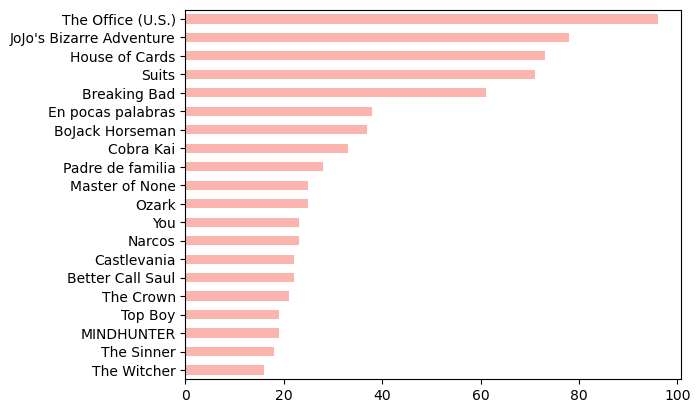

In [26]:
df.loc[df.tipo == 'serie'].nivel1.value_counts(ascending = True).tail(20).plot.barh(cmap = 'Pastel1');

In [27]:
df[df.Title.str.contains('DAHMER')]

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,año,mes,dia_mes,dia_semana
fecha,,,,,,,,,,,
2022-10-23,DAHMER: Monstruo: La historia de Jeffrey Dahme...,serie,DAHMER,Monstruo,La historia de Jeffrey Dahmer,"Dios del perdón, dios de la venganza",None,2022,October,23,Sunday
2022-10-23,DAHMER: Monstruo: La historia de Jeffrey Dahme...,serie,DAHMER,Monstruo,La historia de Jeffrey Dahmer,El hombre del saco,None,2022,October,23,Sunday
2022-10-23,DAHMER: Monstruo: La historia de Jeffrey Dahme...,serie,DAHMER,Monstruo,La historia de Jeffrey Dahmer,Lionel,None,2022,October,23,Sunday
2022-10-23,DAHMER: Monstruo: La historia de Jeffrey Dahme...,serie,DAHMER,Monstruo,La historia de Jeffrey Dahmer,Casandra,None,2022,October,23,Sunday
2022-10-19,DAHMER: Monstruo: La historia de Jeffrey Dahme...,serie,DAHMER,Monstruo,La historia de Jeffrey Dahmer,Silenciado,None,2022,October,19,Wednesday
2022-10-19,DAHMER: Monstruo: La historia de Jeffrey Dahme...,serie,DAHMER,Monstruo,La historia de Jeffrey Dahmer,Sangre en manos de otros,None,2022,October,19,Wednesday
2022-10-19,DAHMER: Monstruo: La historia de Jeffrey Dahme...,serie,DAHMER,Monstruo,La historia de Jeffrey Dahmer,La caja del buen chico,None,2022,October,19,Wednesday
2022-10-15,DAHMER: Monstruo: La historia de Jeffrey Dahme...,serie,DAHMER,Monstruo,La historia de Jeffrey Dahmer,Hacer un Dahmer,None,2022,October,15,Saturday
2022-10-15,DAHMER: Monstruo: La historia de Jeffrey Dahme...,serie,DAHMER,Monstruo,La historia de Jeffrey Dahmer,No te vayas,None,2022,October,15,Saturday


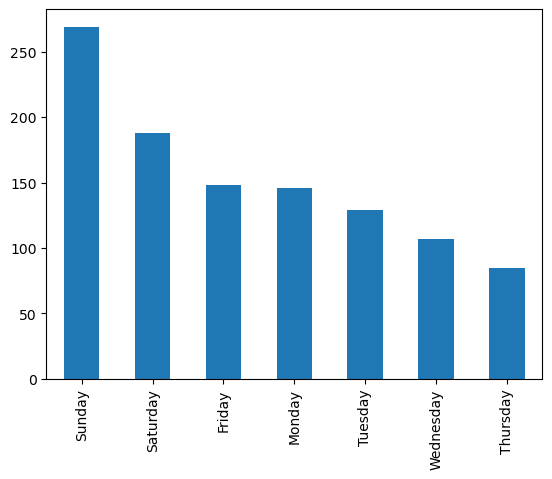

In [28]:
df.loc[df.tipo == 'serie', 'dia_semana'].value_counts().plot(kind = 'bar');

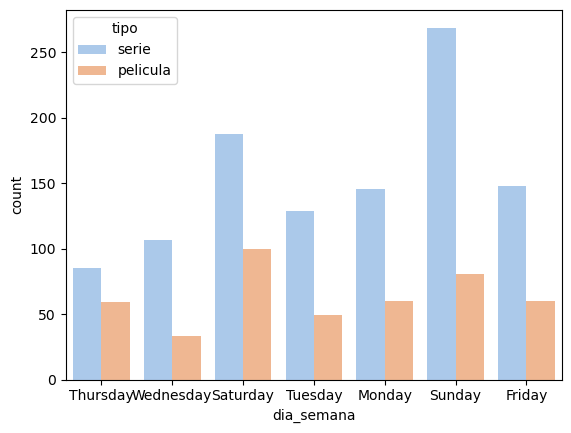

In [29]:
import seaborn as sns

sns.countplot(data = df, x = 'dia_semana', hue = 'tipo', palette= 'pastel');

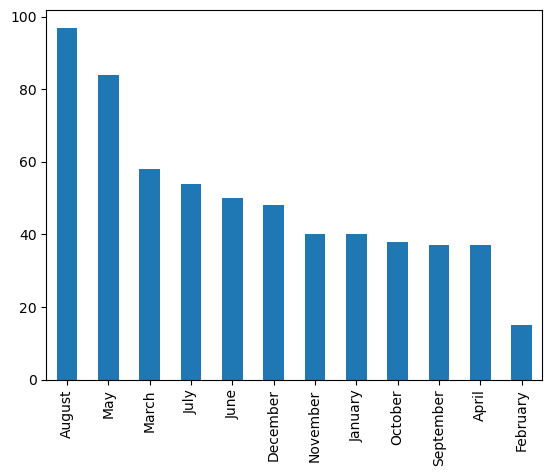

In [30]:
df.loc[df.año < 2021].mes.value_counts().plot.bar();

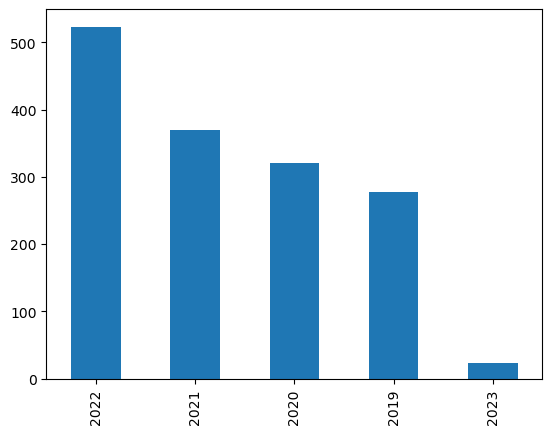

In [31]:
df.año.value_counts().plot.bar();

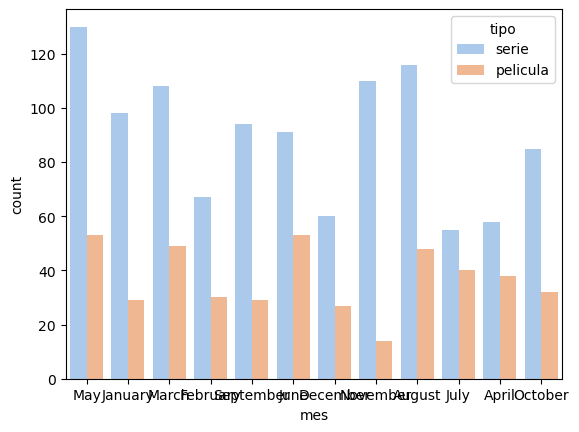

In [32]:
sns.countplot(data = df, x = 'mes', hue = 'tipo', palette= 'pastel');